# Example: Downloading datasets from the ECMWF archive with the `ecmwfapi`

```{note}
The online laboratory has only been tested in recent Firefox and Chrome browsers. Some features may not (yet) be supported in Safari browsers.
```

```{caution}
In the online laboratory, changes to notebooks and local files are only saved in your web browser's storage and not persisted to disk.

Please download copies of any files that you don't want to loose.

Your files from an old session will usually be kept if you close or refresh this page, unless your browser's storage for `lab.climet.eu` is cleared, e.g.
- manually by clearing the browser's site data
- automatically when too much data is stored
- automatically when you close a private browsing context
- if you have setup your browser to clear site data, e.g. when the browser is closed
```

## The ECMWF Archive

The meteorological archive of the European Centre for Medium-Range Weather Forecasts (ECMWF) provides access to meteorological data in GRIB or NetCDF format. The archive can be accessed using the Meteorological Archival and Retrieval System (MARS) online at https://apps.ecmwf.int/mars-catalogue/ or programmatically using the `ecmwfapi` Python package. If you want to install the `ecmwfapi` package yourself, please note that its distribution name on PyPi is `ecmwf-api-client`.

## Installing and configuring the `ecmwfapi` package

To run this example, you need an ECMWF account and your API key, which is available from https://api.ecmwf.int/v1/key/. The key looks as follows:

```json
{
    "url"   : "<ECMWF-API-URL>",
    "key"   : "<ECMWF-API-KEY>",
    "email" : "<ECMWF-API-EMAIL>"
}
```

Please enter these values to configure the `ECMWFDataServer` in the next cell.

Please remember that you must keep your API key private and should not share a notebook that contains your persoal API key.

In [1]:
from ecmwfapi import ECMWFDataServer

server = ECMWFDataServer(**{
    "url"   : "<ECMWF-API-URL>",
    "key"   : "<ECMWF-API-KEY>",
    "email" : "<ECMWF-API-EMAIL>"
})

[pyodide]: Loading ecmwf-api-client
[pyodide]: Loaded ecmwf-api-client


## Retrieving the dataset

You can now retrieve the following example GRIB dataset.

```{tip}
Retrieving a dataset from the ECMWF Archive may take a long time to process, ranging from minutes to hours, as data requests are served on the fly using a queueing system. If you intend to reuse a dataset several times, consider downloading it to your local machine instead of fetching it from the ECMWF archive every time.
```

Once the download has completed, you should have a new `04-t.grib` file in the `data/` subdirectory.

In [2]:
from pathlib import Path

data_path = Path("data") / "04-t.grib"

if not data_path.exists():
    server.retrieve(
        {
            "dataset": "tigge",
            "date": "2024-08-02",
            "expver": "prod",
            "grid": "1/1",
            "levtype": "pl",
            "levelist": "1000",
            "model": "glob",
            "origin": "ecmwf",
            "param": "130",
            "step": "240",
            "time": "00:00:00",
            "type": "fc",
            "target": str(data_path),
        }
    )

2024-12-15 09:15:56 ECMWF API python library 1.6.3
2024-12-15 09:15:56 ECMWF API at https://api.ecmwf.int/v1


[CORS]: The origin https://api.ecmwf.int does not support Cross-Origin Resource Sharing.
        Requests to this origin are being proxied, which may reduce performance.

        Please ask the maintainers of https://api.ecmwf.int to enable CORS using the
        Access-Control-Allow-Origin header.

        Please see https://developer.mozilla.org/en-US/docs/Web/HTTP/CORS for
        more information about Cross-Origin Resource Sharing.


2024-12-15 09:15:57 Welcome Juniper Tyree
2024-12-15 09:15:58 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2024-12-15 09:15:58 ------------ WARNING ------------
2024-12-15 09:15:58 Access to this dataset is transitioning to a new interface, dates to be announced soon
2024-12-15 09:15:58 For more information on how to access this data in the future, visit https://confluence.ecmwf.int/x/-wUiEw
2024-12-15 09:15:58 ---------------------------------
2024-12-15 09:15:58 Request submitted
2024-12-15 09:15:58 Request id: 675e8227641632edc07201d6
2024-12-15 09:15:58 Request is submitted
2024-12-15 09:16:00 Request is active
2024-12-15 09:16:05 Calling 'nice mars /tmp/20241215-0710/51/tmp-_mars-OPZ3j2.req'
2024-12-15 09:16:05 Forcing MIR_CACHE_PATH=/data/ec_coeff
2024-12-15 09:16:05 mars - WARN -
2024-12-15 09:16:05 mars - WARN -
2024-12-15 09:16:05 MIR environment variables:
2024-12-15 09:16:05 MIR_CACHE_PATH=/data/ec

[CORS]: The origin https://apps.ecmwf.int does not support Cross-Origin Resource Sharing.
        Requests to this origin are being proxied, which may reduce performance.

        Please ask the maintainers of https://apps.ecmwf.int to enable CORS using the
        Access-Control-Allow-Origin header.

        Please see https://developer.mozilla.org/en-US/docs/Web/HTTP/CORS for
        more information about Cross-Origin Resource Sharing.


2024-12-15 09:16:06 Transfer rate 184.436 Kbytes/s


In [3]:
import cfgrib
import xarray as xr

ds = xr.open_dataset(data_path)
ds

[pyodide]: Loading attrs, cffi, cfgrib, click, eccodes, findlibs, numpy, pandas, pyarrow, pycparser, pyodide-unix-timezones, python-dateutil, pytz, tzdata, xarray
[pyodide]: Loaded attrs, cffi, cfgrib, click, eccodes, findlibs, numpy, pandas, pyarrow, pycparser, pyodide-unix-timezones, python-dateutil, pytz, tzdata, xarray


<xarray.Dataset> Size: 526kB
Dimensions:        (latitude: 181, longitude: 360)
Coordinates:
    time           datetime64[ns] 8B ...
    step           timedelta64[ns] 8B ...
    isobaricInhPa  float64 8B ...
  * latitude       (latitude) float64 1kB 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    valid_time     datetime64[ns] 8B ...
Data variables:
    t              (latitude, longitude) float64 521kB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-12-15T09:16 GRIB to CDM+CF via cfgrib-0.9.1...

[pyodide]: Memory usage has grown to 215.2MiB (from 49.9MiB) for this notebook


## Plotting the dataset

In [4]:
import earthkit
import earthkit.plots.quickmap

[pyodide]: Loading Cartopy, Jinja2, MarkupSafe, Pillow, adjustText, affine, astropy, astropy_iers_data, cdsapi, cftime, cligj, cloudpickle, cycler, dask, datapi, earthkit, earthkit-data, earthkit-geo, earthkit-meteo, earthkit-plots, earthkit-plots-default-styles, earthkit-regrid, earthkit-time, earthkit-transforms, ecmwf-opendata, entrypoints, filelock, fiona, flexcache, flexparser, fonttools, gdal, geopandas, geos, h5py, healpy, importlib_metadata, jsonschema, jsonschema_specifications, kiwisolver, locket, lru-dict, markdown, matplotlib, matplotlib-pyodide, multiurl, netcdf4, openblas, partd, pdbufr, pint, pkgconfig, platformdirs, plotly, pyerfa, pyparsing, pyproj, pyrsistent, pyshp, pyyaml, rasterio, referencing, rpds-py, scipy, setuptools, shapely, toolz, tqdm, typing-extensions, zipp
[pyodide]: Loaded Cartopy, Jinja2, MarkupSafe, Pillow, adjustText, affine, astropy, astropy_iers_data, cdsapi, cftime, cligj, cloudpickle, cycler, dask, datapi, earthkit, earthkit-data, earthkit-geo, e

/lib/python3.12/site-packages/earthkit/regrid/utils/caching.py:27: UserWarning: only soft file lock is available
  from filelock import FileLock


[pyodide]: Memory usage has grown to 310.0MiB (from 215.2MiB) for this notebook


We finally plot the loaded dataset. `earthkit` provides the

```python
earthkit.plots.quickmap.plot(
    data, units=None, style=None, **kwargs,
) -> earthkit.plots.components.maps.Map
```

helper function to plot weather and climate maps data.

In this example, we plot the temperature variable `t` from the dataset.

In [5]:
da = ds["t"]

/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


[pyodide]: Memory usage has grown to 372.0MiB (from 310.0MiB) for this notebook


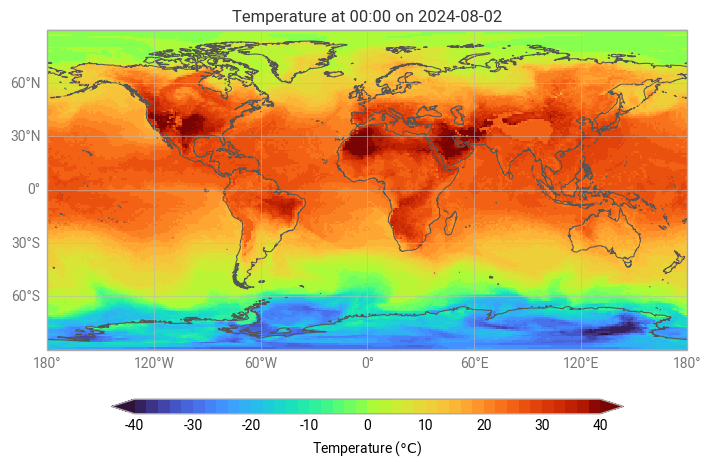

In [6]:
earthkit.plots.quickmap.plot(da, units="degC");